In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [7]:
crimedata = pd.read_csv("C:\\Users\Vijay\\Desktop\\DATA SCIENCE\\ASSISGNMENTS\\Assisgnment 4 (Clustering)\\crime_data.csv")
crimedata.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
#Normalization
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

crime_norm=norm_func(crimedata.iloc[:,1:])

([<matplotlib.axis.XTick at 0x2263660ca48>,
 <a list of 14 Text xticklabel objects>)

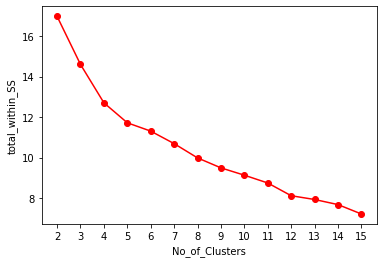

In [9]:
##Find the optimal value of clusters(k)using screen plot(elbow method)####
k=list(range(2,16))
TWSS= []
for i in k:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(crime_norm)
    WSS= []
    for j in range (i):
         WSS.append(sum(cdist(crime_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,crime_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)   

3    12
0    12
4    10
1     9
2     7
Name: cluster, dtype: int64

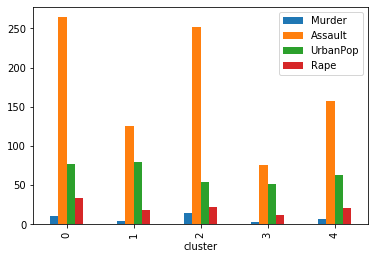

In [10]:
##Selected k=5 from screen plot ###
model= KMeans(n_clusters=5)    
model.fit(crime_norm)    
model.labels_    
cr=pd.Series(model.labels_)  
crimedata['cluster']=cr    
crimedata=crimedata.iloc[:,[5,0,1,2,3,4]]    
crimedata.iloc[:,[1,2,3,4,5]].groupby(crimedata.cluster).mean().plot(kind="bar")  
crimedata.cluster.value_counts()

In [ ]:
##Inferences from the clusters:-
##The American states with a higher urban population in cluster 1 and 0 have highest assult rate and rape rate 
##On the contary, all the attibutes are lowest on the cluster 2 where the urban population is also the lowest
##Urban population is directly propotional to all the crime rates
## Higher the assault rate, higher will be the rape rate in these american states.  